# Financial Econometrics I: Homework 2
Jan Kubal & Matyáš Mattanelli

## Problem 1

### 1. Loading data

In [36]:
#loading the fst package
#install.packages("fst")
library(fst)

In [37]:
#reading data
data_BAC_full <- read_fst("HW_3_data/HW_3_BAC_1min.fst")
data_MSFT_full <- read_fst("HW_3_data/HW_3_MSFT_1min.fst")
data_XOM_full <- read_fst("HW_3_data/HW_3_XOM_1min.fst")

In [38]:
#basic data exploration, to be removed later
summary(data_BAC_full)
summary(data_MSFT_full)
summary(data_XOM_full)

     index                           V1        
 Min.   :2010-01-04 07:00:00   Min.   : 4.601  
 1st Qu.:2011-11-30 15:15:15   1st Qu.:11.239  
 Median :2013-11-22 10:39:30   Median :14.030  
 Mean   :2013-12-13 06:31:08   Mean   :14.205  
 3rd Qu.:2015-12-24 10:24:45   3rd Qu.:16.056  
 Max.   :2017-12-29 17:59:00   Max.   :29.796  

     index                           V1       
 Min.   :2010-01-04 07:44:00   Min.   :18.43  
 1st Qu.:2011-12-08 08:45:00   1st Qu.:23.52  
 Median :2013-12-18 15:51:00   Median :32.80  
 Mean   :2013-12-27 07:27:58   Mean   :37.81  
 3rd Qu.:2016-01-08 16:04:00   3rd Qu.:48.79  
 Max.   :2017-12-29 18:00:00   Max.   :86.52  

     index                           V1       
 Min.   :2010-01-04 07:01:00   Min.   :43.45  
 1st Qu.:2011-11-28 14:52:30   1st Qu.:65.99  
 Median :2013-12-18 11:05:00   Median :74.10  
 Mean   :2013-12-18 02:42:53   Mean   :71.51  
 3rd Qu.:2015-12-23 12:52:30   3rd Qu.:79.09  
 Max.   :2017-12-29 17:56:00   Max.   :90.13  

In [39]:
sum(is.na(data_BAC_full$V1))
sum(is.na(data_MSFT_full$V1))
sum(is.na(data_XOM_full$V1))

[1] 0

[1] 0

[1] 0

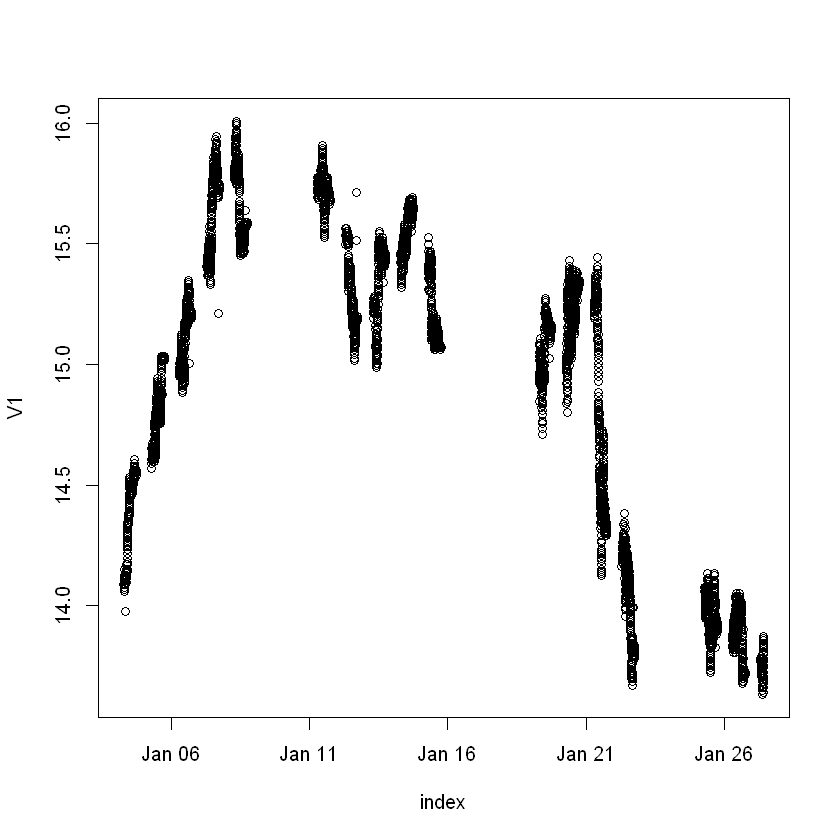

In [40]:
#plot(data_BAC) #<------takes 1 minute to plot
plot(data_BAC_full[1:10000,])

#as usual, we have data on workdays (because stock-exchanges serves need to rest for 2 days XD)

In [41]:
#data_BAC_full[1:100000,]
head(data_BAC_full)
tail(data_BAC_full)

,index,V1
,<dttm>,<dbl>
1,2010-01-04 07:00:00,14.0864
2,2010-01-04 07:04:00,14.0864
3,2010-01-04 07:06:00,14.0679
4,2010-01-04 07:08:00,14.0586
5,2010-01-04 07:13:00,14.0772
6,2010-01-04 07:21:00,14.1050


,index,V1
,<dttm>,<dbl>
1134045,2017-12-29 17:53:00,29.2502
1134046,2017-12-29 17:54:00,29.2403
1134047,2017-12-29 17:56:00,29.2403
1134048,2017-12-29 17:57:00,29.2601
1134049,2017-12-29 17:58:00,29.2403
1134050,2017-12-29 17:59:00,29.2403


### 2. Restricting data

In [42]:
data_BAC <- subset(data_BAC_full, format(data_BAC_full$index,'%Y') >= '2012' & 
                        format(data_BAC_full$index,'%Y') <= '2016' &
                        format(data_BAC_full$index,'%H:%M') >= '09:30' &
                        format(data_BAC_full$index,'%H:%M') <= '16:00')

data_MSFT <- subset(data_MSFT_full, format(data_MSFT_full$index,'%Y') >= '2012' & 
                        format(data_MSFT_full$index,'%Y') <= '2016' &
                        format(data_MSFT_full$index,'%H:%M') >= '09:30' &
                        format(data_MSFT_full$index,'%H:%M') <= '16:00')

data_XOM <- subset(data_XOM_full, format(data_XOM_full$index,'%Y') >= '2012' & 
                        format(data_XOM_full$index,'%Y') <= '2016' &
                        format(data_XOM_full$index,'%H:%M') >= '09:30' &
                        format(data_XOM_full$index,'%H:%M') <= '16:00')                                                


In [43]:
summary(data_BAC)
head(data_BAC)

     index                           V1        
 Min.   :2012-01-03 09:30:00   Min.   : 5.256  
 1st Qu.:2013-04-05 11:59:30   1st Qu.:11.456  
 Median :2014-07-07 10:19:00   Median :14.291  
 Mean   :2014-07-04 09:45:42   Mean   :13.364  
 3rd Qu.:2015-10-02 12:23:30   3rd Qu.:15.624  
 Max.   :2016-12-30 16:00:00   Max.   :22.841  

,index,V1
,<dttm>,<dbl>
296344,2012-01-03 09:30:00,5.3773
296345,2012-01-03 09:31:00,5.3773
296346,2012-01-03 09:32:00,5.3960
296347,2012-01-03 09:33:00,5.4147
296348,2012-01-03 09:34:00,5.4240
296349,2012-01-03 09:35:00,5.4334


### 3. Getting intraday 1-minute returns

In [44]:
#This works, but is slow :( ... cca an hour per ticker

days <- unique(format(data_BAC$index,'%Y-%m-%d')) #get the vector of unique days
BAC_intr_returns <- data.frame(index = data_BAC$index, ret = vector("numeric", length(data_BAC$index))) #dataframe to hold returns, has column of days and empty numeric col.

for (d in days[1:5]) { #restrict days to small sample, just to see if it works well
   day_data <- data_BAC[format(data_BAC$index, '%Y-%m-%d') == d,] #get the price data for a specific day

   day_returns <- rbind(c(NA, NA), sapply(day_data, function(p) {diff(p, lag = 1)/lag(p)})) #get the returns on that day, insert first NA/NA row



   BAC_intr_returns$ret[format(data_BAC$index, '%Y-%m-%d') == d] <- day_returns[-nrow(day_returns):-nrow(day_returns),2] #save returns (chop off the last row for matching lengths)

   print(paste("Finished returns on", d, sep = "")) #just to know how long it will take
}

Warning message in FUN(X[[i]], ...):
"Incompatible methods ("/.difftime", "Ops.POSIXt") for "/""
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"


[1] "Finished returns on2012-01-03"


Warning message in FUN(X[[i]], ...):
"Incompatible methods ("/.difftime", "Ops.POSIXt") for "/""
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"


[1] "Finished returns on2012-01-04"


Warning message in FUN(X[[i]], ...):
"Incompatible methods ("/.difftime", "Ops.POSIXt") for "/""
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"


[1] "Finished returns on2012-01-05"


Warning message in FUN(X[[i]], ...):
"Incompatible methods ("/.difftime", "Ops.POSIXt") for "/""
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"


[1] "Finished returns on2012-01-06"


Warning message in FUN(X[[i]], ...):
"Incompatible methods ("/.difftime", "Ops.POSIXt") for "/""
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"
Warning message in diff(p, lag = 1)/lag(p):
"longer object length is not a multiple of shorter object length"


[1] "Finished returns on2012-01-09"


In [45]:
print(data.frame(BAC_intr_returns, data_BAC)) #in text editor it can be manually checked that it works

                     index          ret             index.1     V1
296344 2012-01-03 09:30:00           NA 2012-01-03 09:30:00 5.3773
296345 2012-01-03 09:31:00  0.000000000 2012-01-03 09:31:00 5.3773
296346 2012-01-03 09:32:00  0.003477582 2012-01-03 09:32:00 5.3960
296347 2012-01-03 09:33:00  0.003465530 2012-01-03 09:33:00 5.4147
296348 2012-01-03 09:34:00  0.001717547 2012-01-03 09:34:00 5.4240
296349 2012-01-03 09:35:00  0.001733038 2012-01-03 09:35:00 5.4334
296350 2012-01-03 09:36:00 -0.001730040 2012-01-03 09:36:00 5.4240
296351 2012-01-03 09:37:00  0.000000000 2012-01-03 09:37:00 5.4240
296352 2012-01-03 09:38:00  0.001733038 2012-01-03 09:38:00 5.4334
296353 2012-01-03 09:39:00  0.000000000 2012-01-03 09:39:00 5.4334
296354 2012-01-03 09:40:00  0.000000000 2012-01-03 09:40:00 5.4334
296355 2012-01-03 09:41:00 -0.001730040 2012-01-03 09:41:00 5.4240
296356 2012-01-03 09:42:00 -0.001714602 2012-01-03 09:42:00 5.4147
296357 2012-01-03 09:43:00  0.000000000 2012-01-03 09:43:00 5.

In [46]:
## Much simpler way of getting the intraday data (three cells, one for each stock)

#length(c(NA, diff(data_BAC$V1))/lag(data_BAC$V1)) #match this vector with timestamps and replace data on 9:30 with NA
BAC_intr_returns <- data.frame(data_BAC, ret = c(NA, diff(data_BAC$V1))/lag(data_BAC$V1))
BAC_intr_returns$ret[format(BAC_intr_returns$index, '%H:%M') == '09:30'] <- NA #same result as the for loop above, but much simpler
#print(BAC_intr_returns) #again manual inspection

In [47]:
MSFT_intr_returns <- data.frame(data_MSFT, ret = c(NA, diff(data_MSFT$V1))/lag(data_MSFT$V1))
MSFT_intr_returns$ret[format(MSFT_intr_returns$index, '%H:%M') == '09:30'] <- NA
#print(MSFT_intr_returns)

In [48]:
XOM_intr_returns <- data.frame(data_XOM, ret = c(NA, diff(data_XOM$V1))/lag(data_XOM$V1))
XOM_intr_returns$ret[format(XOM_intr_returns$index, '%H:%M') == '09:30'] <- NA
#print(MSFT_intr_returns)

### 4. Examining the behavior of rCov() function

In [49]:
#install.packages("highfrequency")
library(highfrequency)
library(xts)

In [61]:
rcov_xts <- as.xts(BAC_intr_returns[,2:3], order.by = BAC_intr_returns$index) #it seems that rCov() needs to get data in xts object, so here we save data in xts


In [51]:
#saving output of rCov(), first price -> returns -> RV, then returns -> RV
rcov_prices <- rCov(rcov_xts$V1, makeReturns = TRUE)
rcov_returns <- rCov(na.omit(rcov_xts$ret), makeReturns = FALSE) #it had problem with NAs, so I ommited them

In [52]:
nrow(rcov_xts)
nrow(rcov_prices) #<- one observation per day, as Realized Variance is daily measure
nrow(rcov_returns)

[1] 490419

[1] 1258

[1] 1258

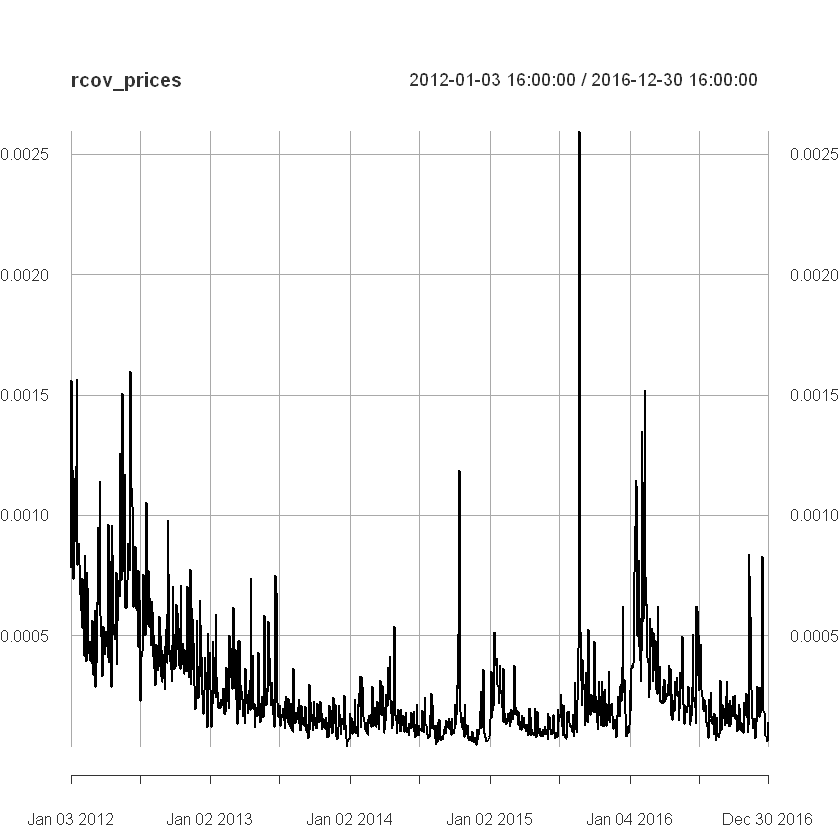

In [53]:
plot(rcov_prices)

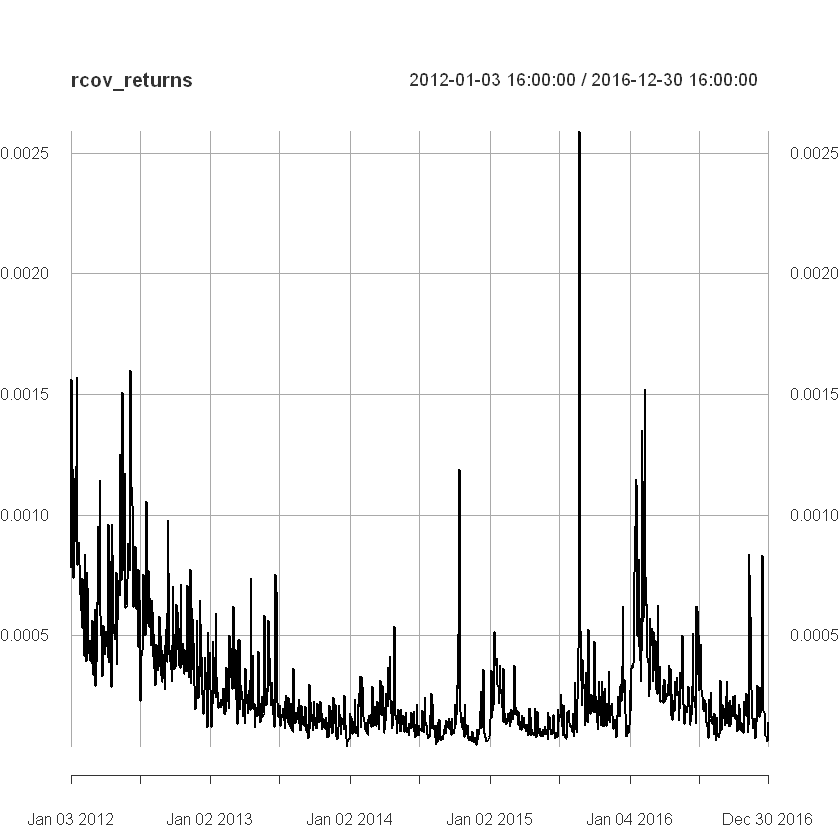

In [54]:
plot(rcov_returns)

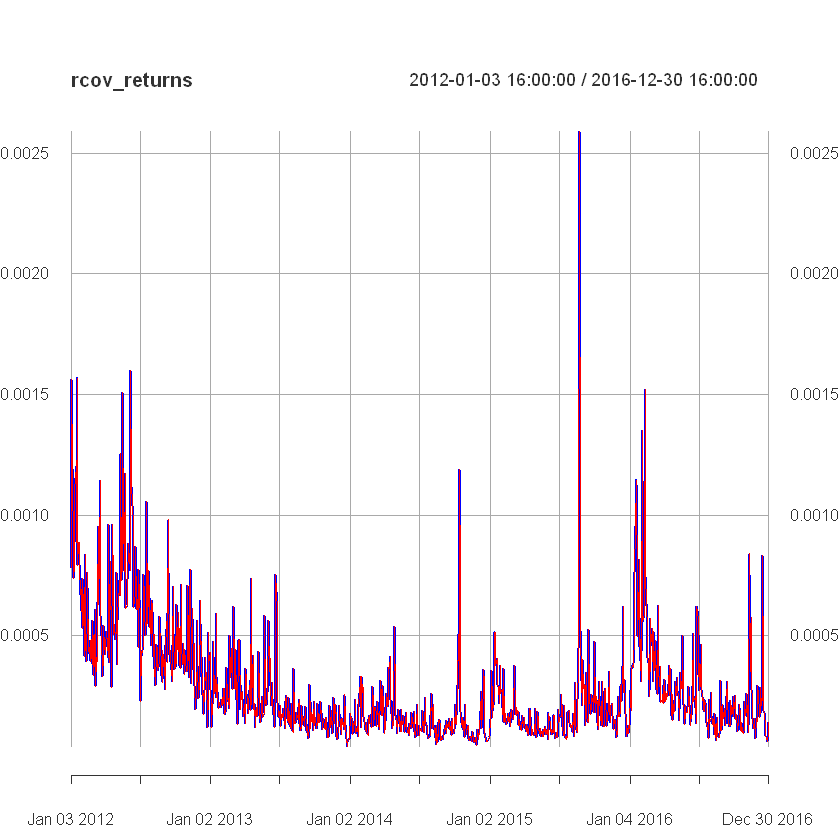

In [68]:
plot <- plot(rcov_returns, col = "blue")
lines(rcov_prices, col= "red") # they seem to be almost the same, let's take a look at summary and differences

In [71]:
summary(rcov_returns)
summary(rcov_prices) #median and 1st and 3rd quantiles differ slightly

     Index                          ret           
 Min.   :2012-01-03 16:00:00   Min.   :0.0000410  
 1st Qu.:2013-04-06 10:00:00   1st Qu.:0.0001343  
 Median :2014-07-05 15:59:30   Median :0.0002046  
 Mean   :2014-07-04 12:00:43   Mean   :0.0002894  
 3rd Qu.:2015-10-02 10:00:00   3rd Qu.:0.0003651  
 Max.   :2016-12-30 16:00:00   Max.   :0.0025905  

     Index                           V1           
 Min.   :2012-01-03 16:00:00   Min.   :0.0000410  
 1st Qu.:2013-04-06 10:00:00   1st Qu.:0.0001344  
 Median :2014-07-05 15:59:30   Median :0.0002045  
 Mean   :2014-07-04 12:00:43   Mean   :0.0002894  
 3rd Qu.:2015-10-02 10:00:00   3rd Qu.:0.0003645  
 Max.   :2016-12-30 16:00:00   Max.   :0.0025965  

In [72]:
summary(rcov_returns$ret-rcov_prices$V1) #we can see there are differences

     Index                          ret            
 Min.   :2012-01-03 16:00:00   Min.   :-5.979e-06  
 1st Qu.:2013-04-06 10:00:00   1st Qu.:-3.323e-08  
 Median :2014-07-05 15:59:30   Median : 3.881e-09  
 Mean   :2014-07-04 12:00:43   Mean   : 2.546e-09  
 3rd Qu.:2015-10-02 10:00:00   3rd Qu.: 4.646e-08  
 Max.   :2016-12-30 16:00:00   Max.   : 3.874e-06  

In [ ]:
## It should be probably done for other tickers as well...just copying the code...I was lazy to do that so far :/

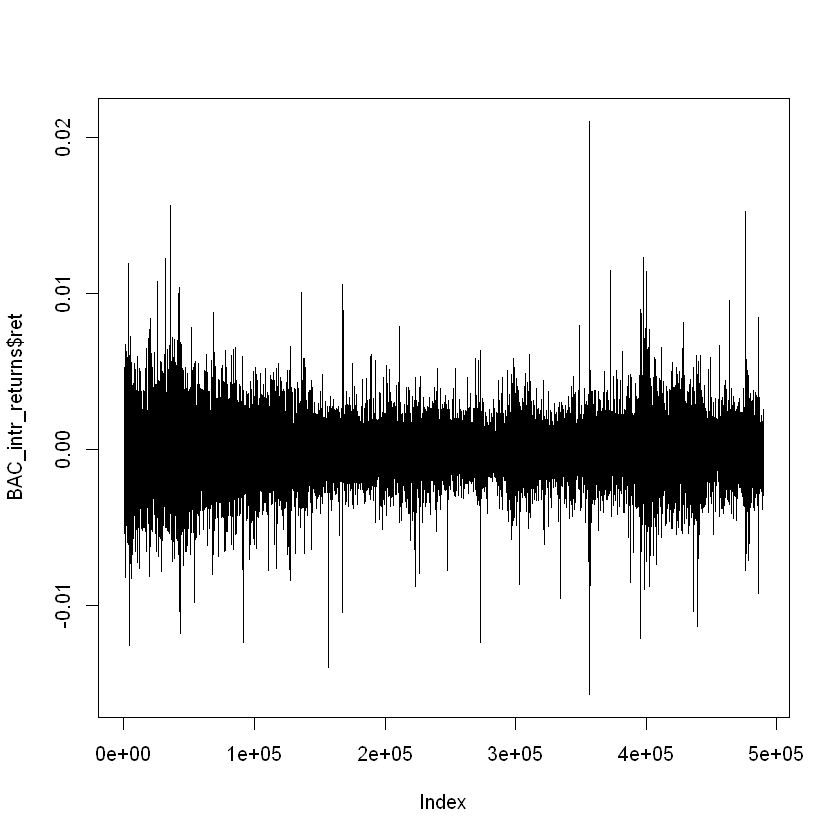

In [55]:
#just interested in the returns:
plot(BAC_intr_returns$ret, type = "l")

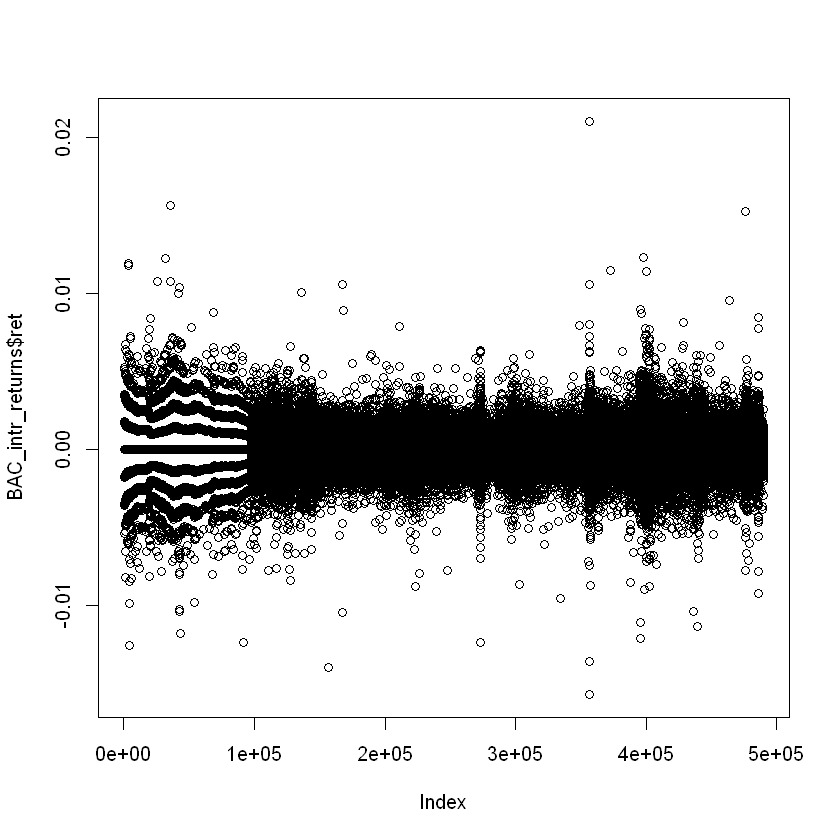

In [56]:
#but look at this, this is weird, whats that patern at the first year?
plot(BAC_intr_returns$ret)
#perhaps there are only some fixed options the BIDers and ASKers can choose?

### 5. Realized Variance for intraday sub-periods

In [108]:
#dividing data to thre intraday sub-periods
#BAC
#period 1
BAC_intr_returns_subset1 <- subset(BAC_intr_returns, format(BAC_intr_returns$index, '%H:%M') >= '09:30' &
                                                    format(BAC_intr_returns$index, '%H:%M') <= '10:59')
BAC_ir_sub1_xts <- as.xts(BAC_intr_returns_subset1$ret, order.by = BAC_intr_returns_subset1$index)

#period 2
BAC_intr_returns_subset2 <- subset(BAC_intr_returns, format(BAC_intr_returns$index, '%H:%M') >= '11:00' &
                                                    format(BAC_intr_returns$index, '%H:%M') <= '14:29')
BAC_ir_sub2_xts <- as.xts(BAC_intr_returns_subset2$ret, order.by = BAC_intr_returns_subset2$index)

#period 3
BAC_intr_returns_subset3 <- subset(BAC_intr_returns, format(BAC_intr_returns$index, '%H:%M') >= '14:30' &
                                                    format(BAC_intr_returns$index, '%H:%M') <= '16:00')
BAC_ir_sub3_xts <- as.xts(BAC_intr_returns_subset3$ret, order.by = BAC_intr_returns_subset3$index)

In [109]:
#MSFT
#period 1
MSFT_intr_returns_subset1 <- subset(MSFT_intr_returns, format(MSFT_intr_returns$index, '%H:%M') >= '09:30' &
                                                    format(MSFT_intr_returns$index, '%H:%M') <= '10:59')
MSFT_ir_sub1_xts <- as.xts(MSFT_intr_returns_subset1$ret, order.by = MSFT_intr_returns_subset1$index)

#period 2
MSFT_intr_returns_subset2 <- subset(MSFT_intr_returns, format(MSFT_intr_returns$index, '%H:%M') >= '11:00' &
                                                    format(MSFT_intr_returns$index, '%H:%M') <= '14:29')
MSFT_ir_sub2_xts <- as.xts(MSFT_intr_returns_subset2$ret, order.by = MSFT_intr_returns_subset2$index)

#period 3
MSFT_intr_returns_subset3 <- subset(MSFT_intr_returns, format(MSFT_intr_returns$index, '%H:%M') >= '14:30' &
                                                    format(MSFT_intr_returns$index, '%H:%M') <= '16:00')
MSFT_ir_sub3_xts <- as.xts(MSFT_intr_returns_subset3$ret, order.by = MSFT_intr_returns_subset3$index)

In [110]:
#XOM
#period 1
XOM_intr_returns_subset1 <- subset(XOM_intr_returns, format(XOM_intr_returns$index, '%H:%M') >= '09:30' &
                                                    format(XOM_intr_returns$index, '%H:%M') <= '10:59')
XOM_ir_sub1_xts <- as.xts(XOM_intr_returns_subset1$ret, order.by = XOM_intr_returns_subset1$index)

#period 2
XOM_intr_returns_subset2 <- subset(XOM_intr_returns, format(XOM_intr_returns$index, '%H:%M') >= '11:00' &
                                                    format(XOM_intr_returns$index, '%H:%M') <= '14:29')
XOM_ir_sub2_xts <- as.xts(XOM_intr_returns_subset2$ret, order.by = XOM_intr_returns_subset2$index)

#period 3
XOM_intr_returns_subset3 <- subset(XOM_intr_returns, format(XOM_intr_returns$index, '%H:%M') >= '14:30' &
                                                    format(XOM_intr_returns$index, '%H:%M') <= '16:00')
XOM_ir_sub3_xts <- as.xts(XOM_intr_returns_subset3$ret, order.by = XOM_intr_returns_subset3$index)              

In [111]:
#getting the RVs
#BAC
BAC_sub1_RV <- rCov(na.omit(BAC_ir_sub1_xts), makeReturns = FALSE)
BAC_sub2_RV <- rCov(na.omit(BAC_ir_sub2_xts), makeReturns = FALSE)
BAC_sub3_RV <- rCov(na.omit(BAC_ir_sub3_xts), makeReturns = FALSE)

#MSFT
MSFT_sub1_RV <- rCov(na.omit(MSFT_ir_sub1_xts), makeReturns = FALSE)
MSFT_sub2_RV <- rCov(na.omit(MSFT_ir_sub2_xts), makeReturns = FALSE)
MSFT_sub3_RV <- rCov(na.omit(MSFT_ir_sub3_xts), makeReturns = FALSE)

#XOM
XOM_sub1_RV <- rCov(na.omit(XOM_ir_sub1_xts), makeReturns = FALSE)
XOM_sub2_RV <- rCov(na.omit(XOM_ir_sub2_xts), makeReturns = FALSE)
XOM_sub3_RV <- rCov(na.omit(XOM_ir_sub3_xts), makeReturns = FALSE)

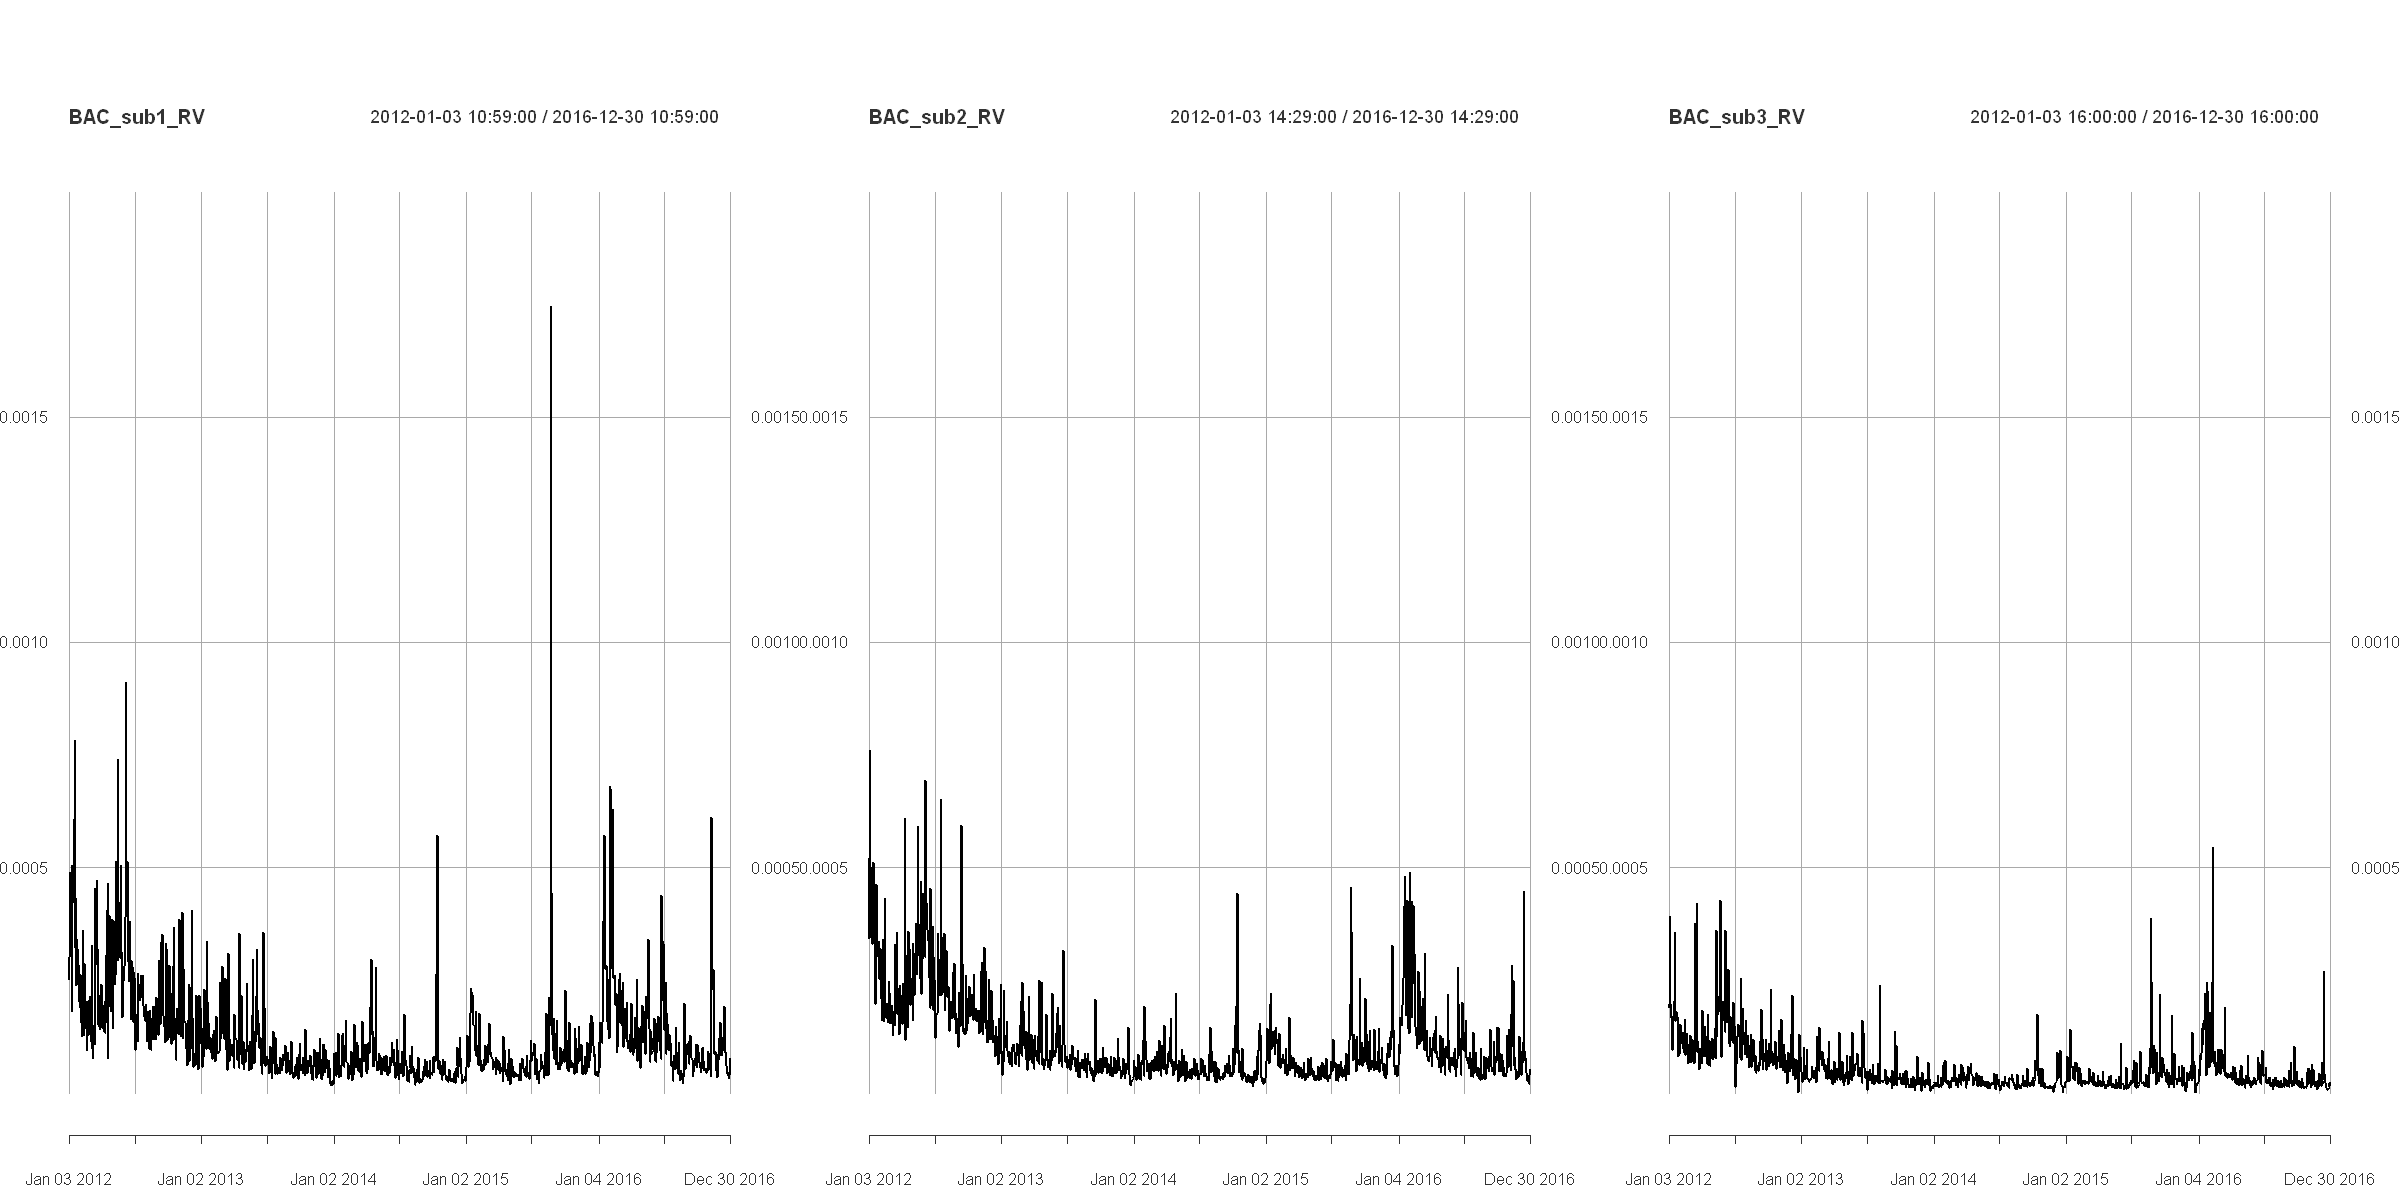

In [126]:
#plotting
options(repr.plot.width = 20, repr.plot.height = 10)
par(mfrow = c(1, 3))
y_lim <- 0.002 #set the range of y axis to the same value, use this parameter to make the changing easier
plot(BAC_sub1_RV, type = "l", ylim = c(0,y_lim))
plot(BAC_sub2_RV, type = "l", ylim = c(0,y_lim))
plot(BAC_sub3_RV, type = "l", ylim = c(0,y_lim))

#alternatively lines() could be used 

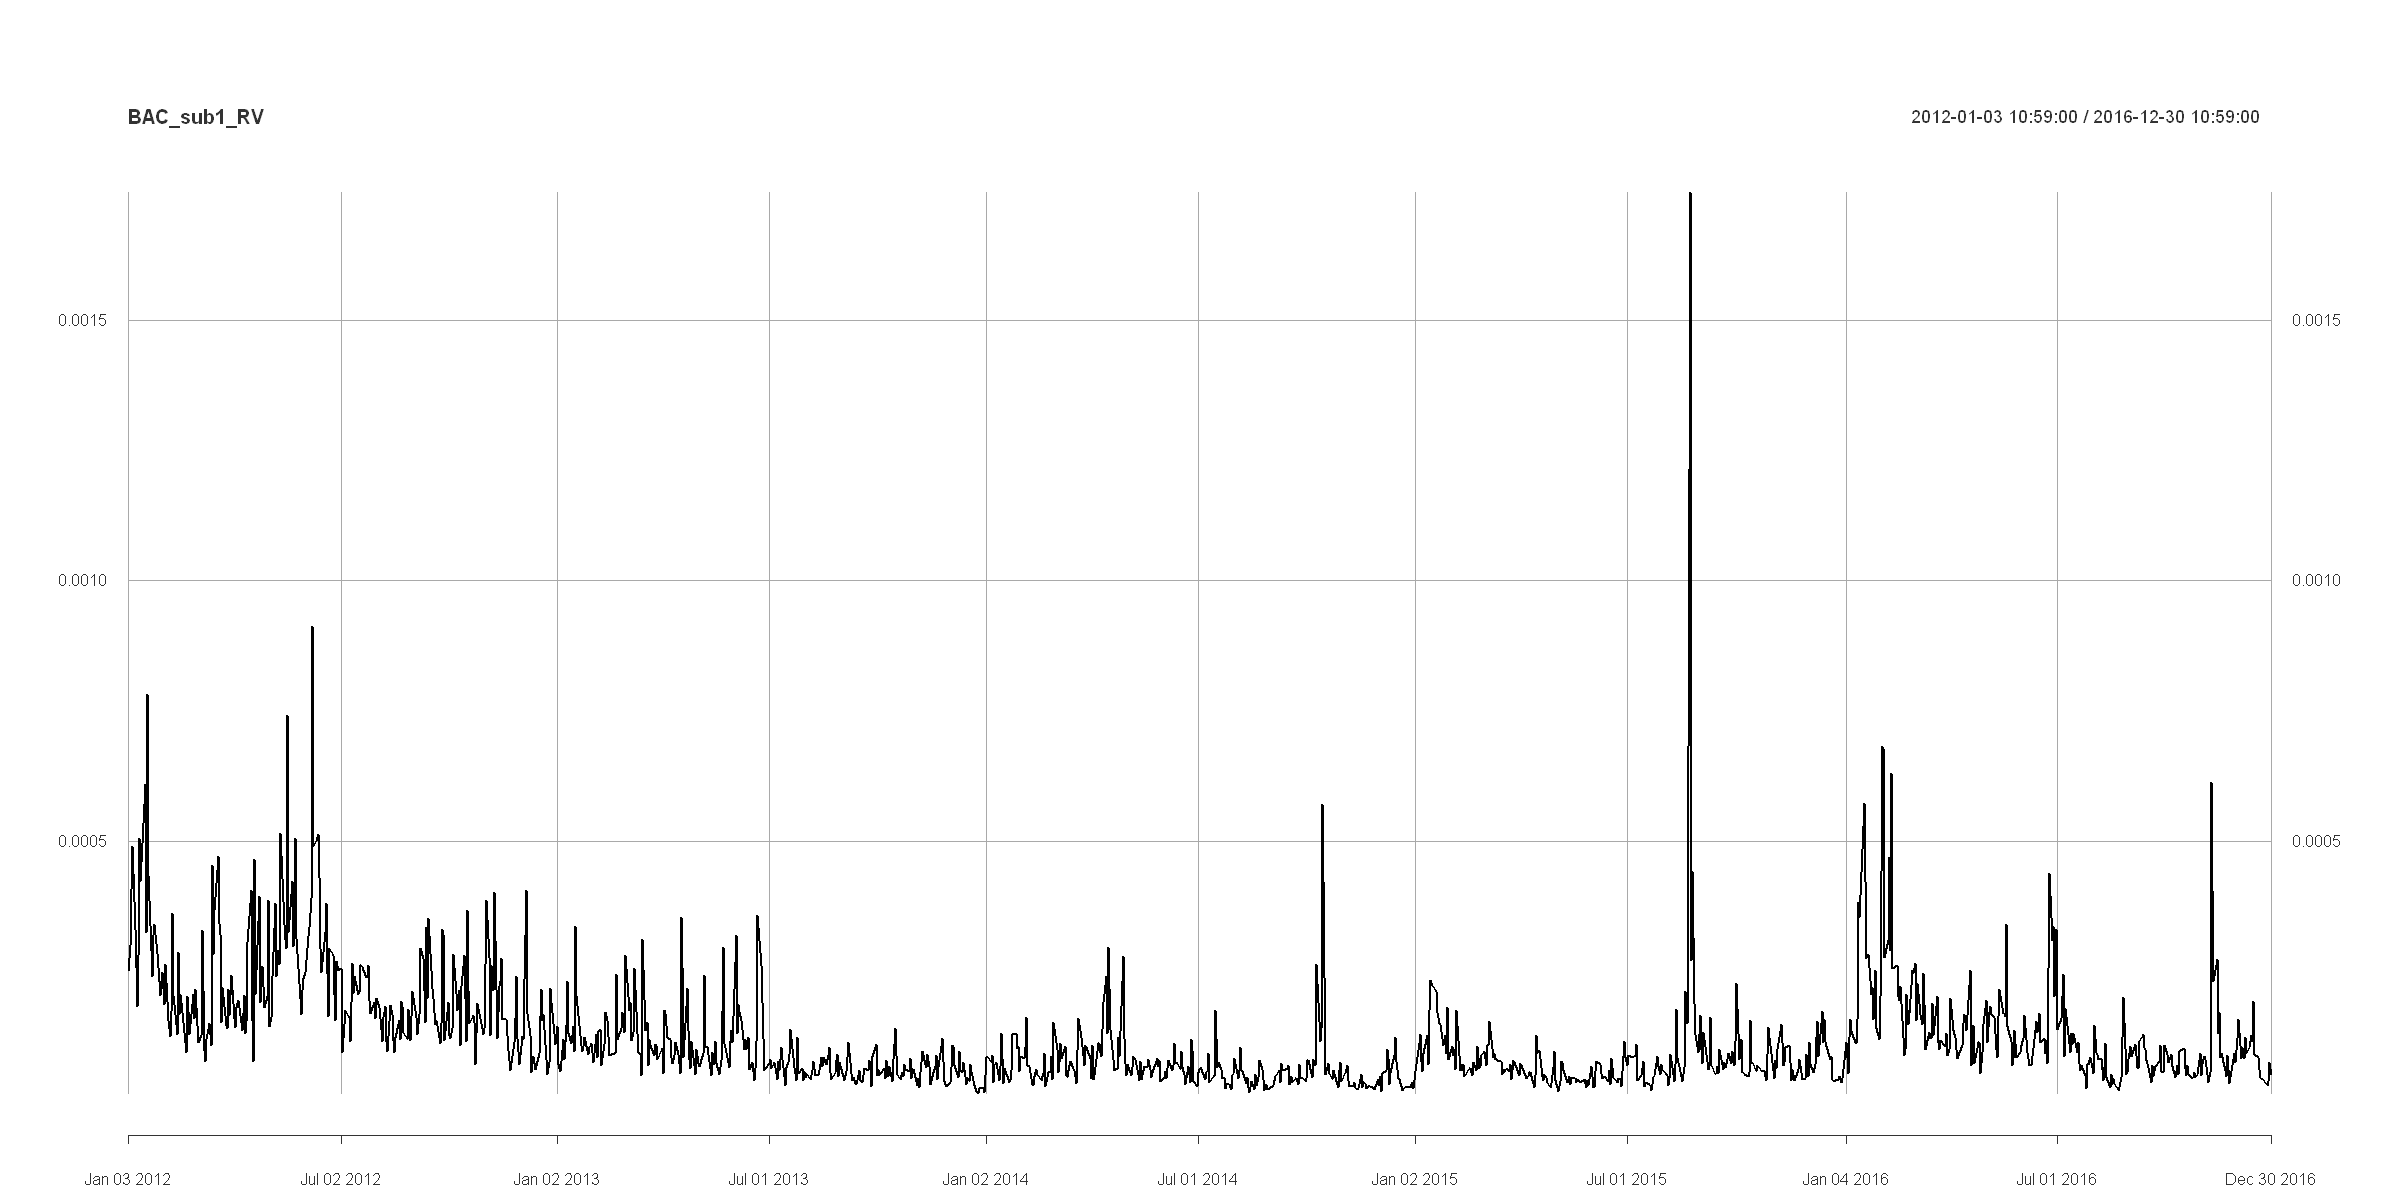

In [130]:
#plot <- plot(BAC_sub1_RV, type = "l")
#lns <- lines(BAC_sub2_RV, col = "blue")
#lines(BAC_sub3_RV, col = "red")


plot(BAC_sub1_RV, type = "l")
lines(BAC_sub2_RV,  col = "blue") #why lines() do not work? :(